# data summary

In [1]:
import pandas as pd

data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'id')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col = 'id')

In [21]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [4]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


bin0 ~ bin4 : binary feature  
nom_0 ~ nom_9 : nominal feature  
ord_0 ~ ord_5 : oridinal feature  

In [29]:
train.shape

(300000, 24)

In [33]:
def resumetable(df):
    print(f'dataset shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['data type'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index' : 'feature'})
    summary['#missing_values'] = df.isnull().sum().values
    summary['#unique_values'] = df.nunique().values
    summary['first row'] = df.loc[0].values
    
    return summary

resumetable(train)

dataset shape: (300000, 24)


,feature,data type,#missing_values,#unique_values,first row
0,bin_0,int64,0,2,0
1,bin_1,int64,0,2,0
2,bin_2,int64,0,2,0
3,bin_3,object,0,2,T
4,bin_4,object,0,2,Y
5,nom_0,object,0,3,Green
6,nom_1,object,0,6,Triangle
7,nom_2,object,0,6,Snake
8,nom_3,object,0,6,Finland
9,nom_4,object,0,4,Bassoon


In [34]:
# binary type
bin_resumetable = resumetable(train).loc[0:4].copy()
bin_resumetable

dataset shape: (300000, 24)


,feature,data type,#missing_values,#unique_values,first row
0,bin_0,int64,0,2,0
1,bin_1,int64,0,2,0
2,bin_2,int64,0,2,0
3,bin_3,object,0,2,T
4,bin_4,object,0,2,Y


In [35]:
# see the unique value of bin_3 and bin_4
bin3_unique = train['bin_3'].unique()
bin4_unique = train['bin_4'].unique()

# Print the unique values
print(f'bin3 unique value : {bin3_unique}\nbin4 unique value : {bin4_unique}')

bin3 unique value : ['T' 'F']
bin4 unique value : ['Y' 'N']


We need to convert the values 'T' and 'Y' to 1, and 'F' and 'N' to 0.

In [36]:
# nominal type
nom_resumetable = resumetable(train).loc[5:14].copy()
nom_resumetable

dataset shape: (300000, 24)


,feature,data type,#missing_values,#unique_values,first row
5,nom_0,object,0,3,Green
6,nom_1,object,0,6,Triangle
7,nom_2,object,0,6,Snake
8,nom_3,object,0,6,Finland
9,nom_4,object,0,4,Bassoon
10,nom_5,object,0,222,50f116bcf
11,nom_6,object,0,522,3ac1b8814
12,nom_7,object,0,1220,68f6ad3e9
13,nom_8,object,0,2215,c389000ab
14,nom_9,object,0,11981,2f4cb3d51


In [37]:
# ordinal type
ord_resumetable = resumetable(train).loc[15:20].copy()
ord_resumetable

dataset shape: (300000, 24)


,feature,data type,#missing_values,#unique_values,first row
15,ord_0,int64,0,3,2
16,ord_1,object,0,5,Grandmaster
17,ord_2,object,0,6,Cold
18,ord_3,object,0,15,h
19,ord_4,object,0,26,D
20,ord_5,object,0,192,kr


In [38]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f" {feature} unique value : {train[feature].unique()}\n")

 ord_0 unique value : [2 1 3]

 ord_1 unique value : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']

 ord_2 unique value : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']



In [39]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f" {feature} unique value : {train[feature].unique()}\n")

 ord_3 unique value : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']

 ord_4 unique value : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']

 ord_5 unique value : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'k

In [40]:
for i in train.columns.tolist()[21:]:
    print(f" {i} unnique value : {train[i].unique()}\n")

 day unnique value : [2 7 5 4 3 1 6]

 month unnique value : [ 2  8  1  4 10  3  7  9 12 11  5  6]

 target unnique value : [0 1]



# data visualization

In [41]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

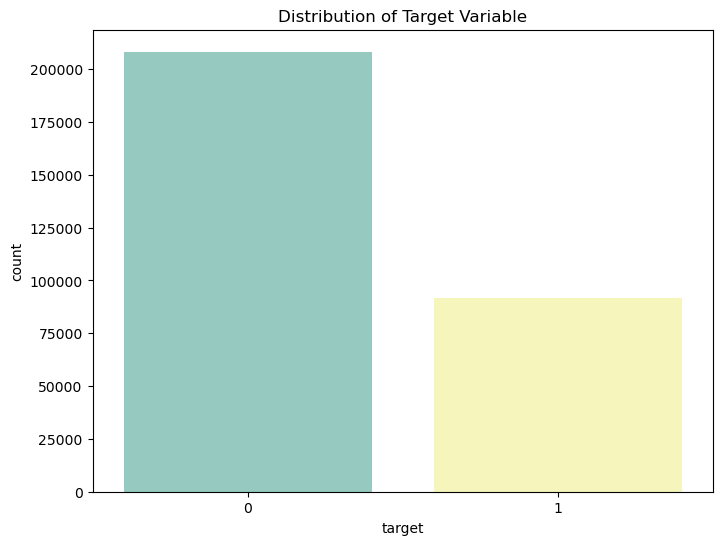

In [42]:
# Before we proceed, it would be useful to analyze the distribution of the target values
plt.figure(figsize=(8, 6))


ax = sns.countplot(x='target', data = train, palette= 'Set3')
ax.set_title('Distribution of Target Variable')

plt.show()

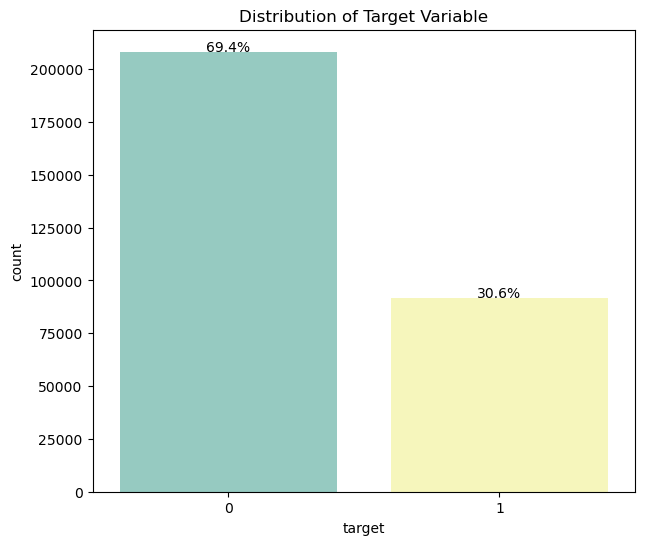

In [43]:
def write_percent(ax, total_size):
    ''' write the target ratio on the bar '''
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size*100
        
        ax.text(x=left_coord + width/2,
                y = height + total_size * 0.001,
                s = f'{percent:1.1f}%',
                ha = 'center')
        
plt.figure(figsize = (7, 6))
ax = sns.countplot(x='target', data = train, palette='Set3')
ax.set_title('Distribution of Target Variable')
write_percent(ax, len(train))

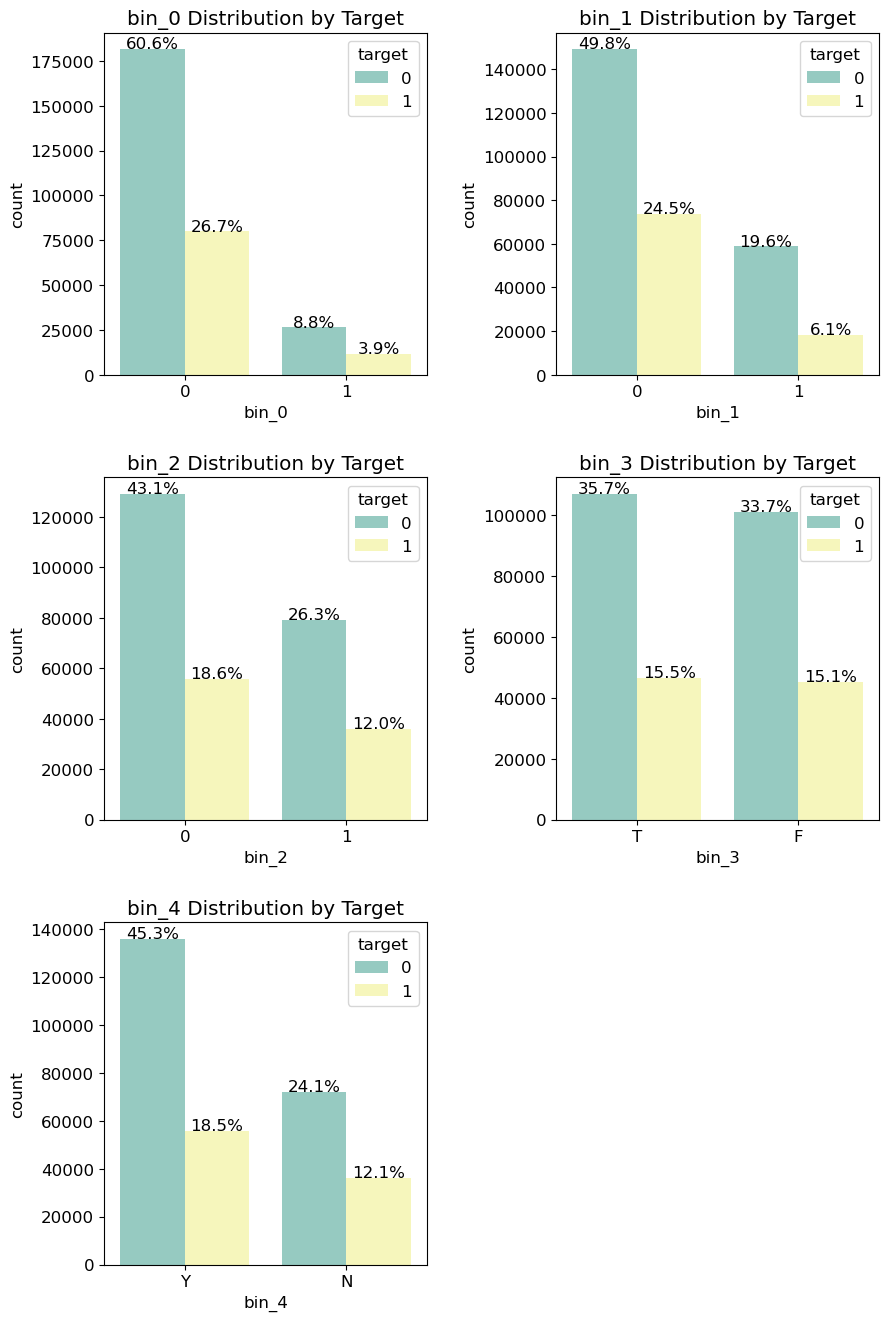

In [44]:
#binary feature distribution
import matplotlib.gridspec as gridspec

mpl.rc('font', size = 12)
grid = gridspec.GridSpec(3, 2)
plt.figure(figsize = (10,16))
# set subplot's left and right margins
plt.subplots_adjust(wspace = 0.4, hspace = 0.3)

bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x = feature,
                 data = train,
                 hue = 'target',
                 palette = 'Set3',
                 ax = ax)
    
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

In [45]:
# nomianl feature distribution
# make cross tabulation analysis function
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize = 'index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [47]:
# we will use crosstab[1] column
for i in range(6):
    crosstab = get_crosstab(train, 'ord_'+str(i))
    print(crosstab)

target  ord_0          0          1
0           1  72.183160  27.816840
1           2  66.531202  33.468798
2           3  60.409133  39.590867
target        ord_1          0          1
0       Contributor  72.146673  27.853327
1            Expert  68.282466  31.717534
2       Grandmaster  59.611510  40.388490
3            Master  64.492211  35.507789
4            Novice  75.794538  24.205462
target        ord_2          0          1
0       Boiling Hot  63.903871  36.096129
1              Cold  74.212272  25.787728
2          Freezing  77.478561  22.521439
3               Hot  67.368516  32.631484
4          Lava Hot  59.687363  40.312637
5              Warm  71.120383  28.879617
target ord_3          0          1
0          a  79.340061  20.659939
1          b  77.954011  22.045989
2          c  76.699309  23.300691
3          d  75.860324  24.139676
4          e  74.042473  25.957527
5          f  72.498213  27.501787
6          g  71.031452  28.968548
7          h  69.300728  30.69

In [48]:
def plot_pointplot(ax, feature, crosstab):
    # twinx() : share the x-axis but keep the y-axis separate
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x = feature, y = 1, data = crosstab,
                       order = crosstab[feature].values,
                       color = 'Red')
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel('Target 1 Ratio(%)')

In [49]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15, 20)):
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace = 0.50, hspace = 0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        
        sns.countplot(x = feature, data = df,
                     order = crosstab[feature].values,
                     color = 'skyblue',
                     ax = ax)
        
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab)
        
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
        ax.set_title(f'{feature} Distribution')

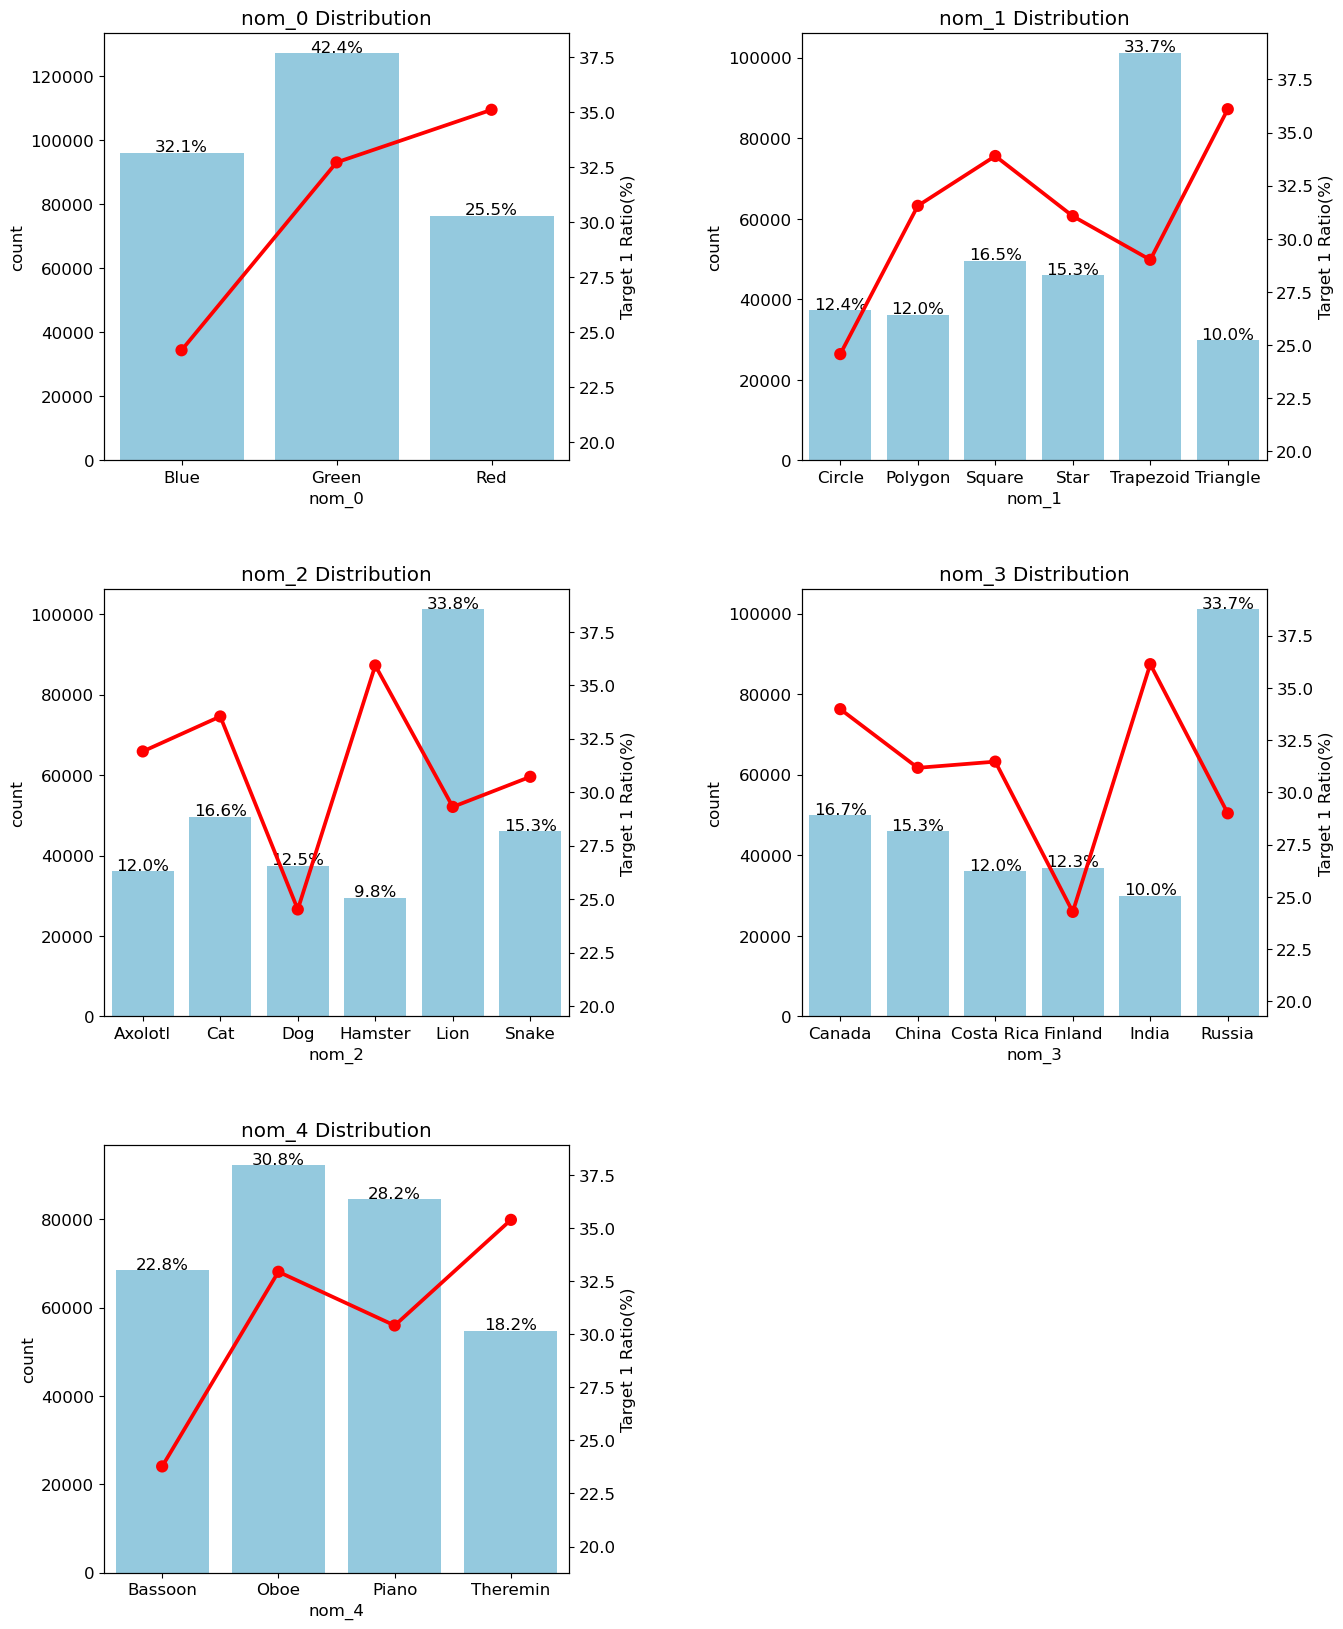

In [20]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols = 2)

In [54]:
# ordinal feature distribution
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
# plot_cat_dist_with_true_ratio(train, ord_features,
 #                            num_rows = 2, num_cols = 2, size = (15, 12))

In [51]:
#change the feature's order 
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories = ord_1_value, ordered = True)
ord_2_dtype = CategoricalDtype(categories = ord_2_value, ordered = True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

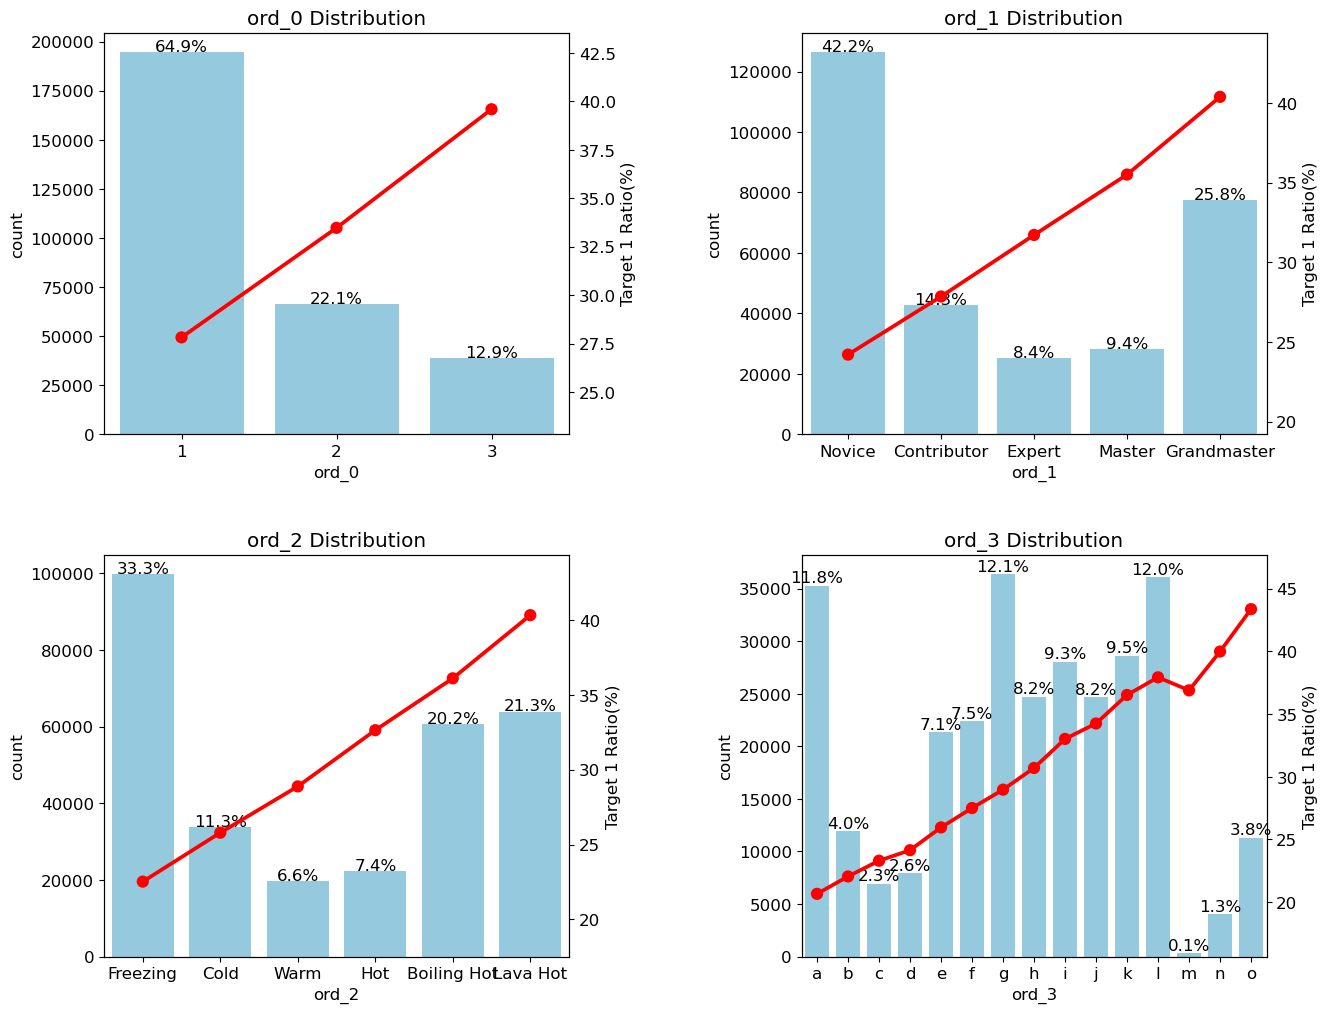

In [52]:
plot_cat_dist_with_true_ratio(train, ord_features,
                             num_rows = 2, num_cols = 2, size=(15,12))

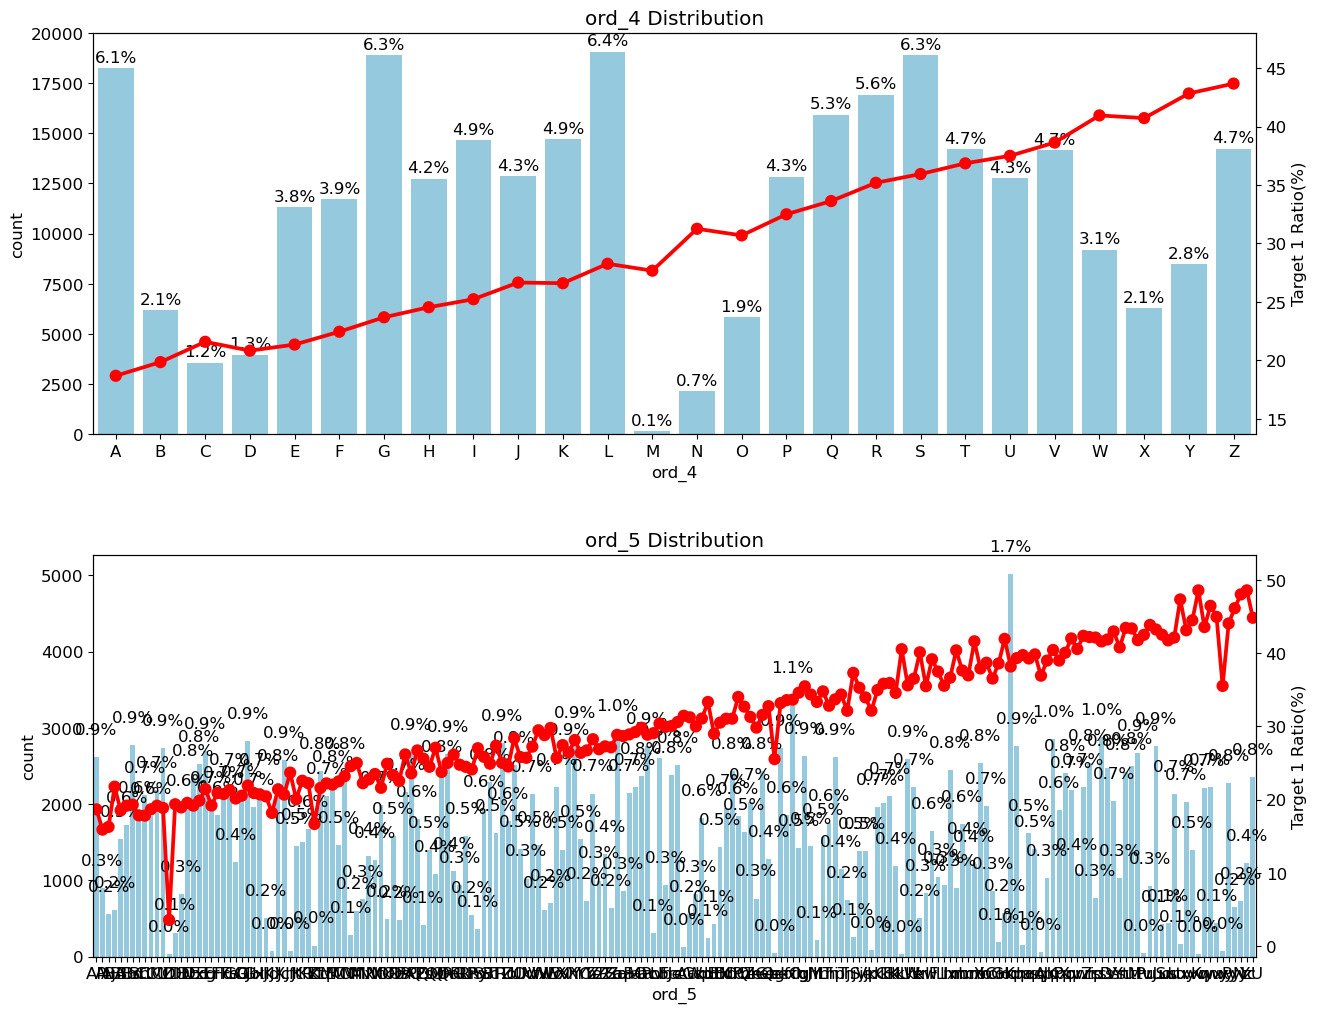

In [38]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'],
                             num_rows = 2, num_cols = 1, size=(15,12))

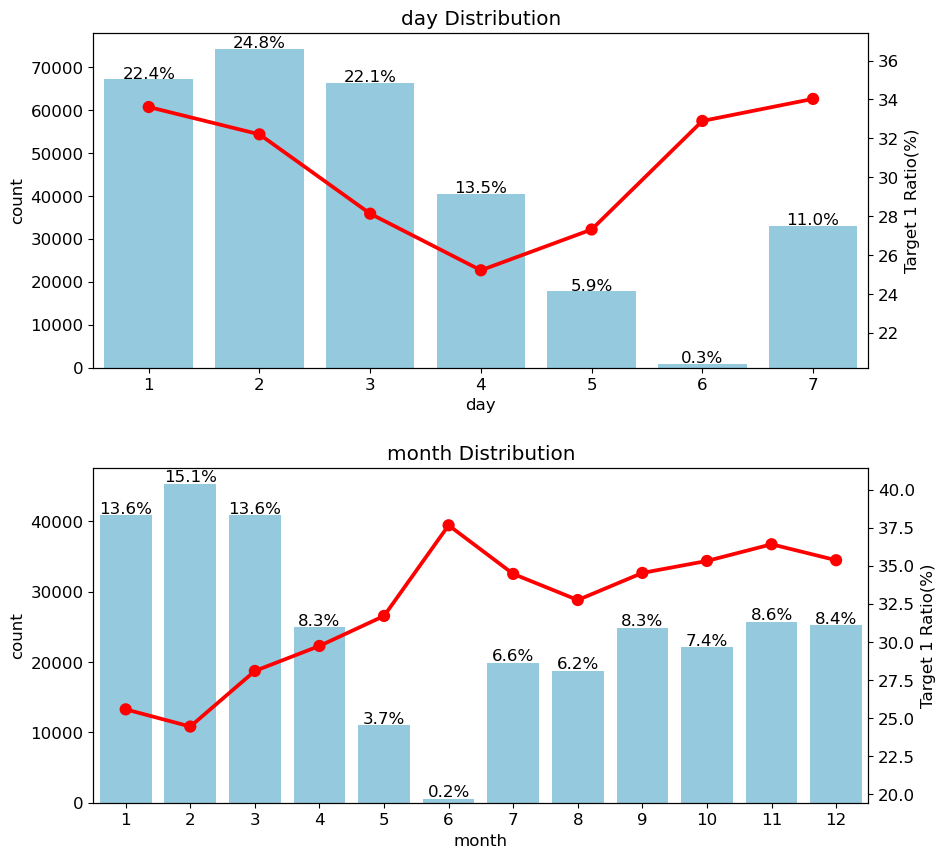

In [39]:
plot_cat_dist_with_true_ratio(train, ['day', 'month'],
                             num_rows = 2, num_cols = 1, size = (10,10))

# Baseline model

In [2]:
import pandas as pd
data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'id')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col = 'id')

In [3]:
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis = 1)
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


In [4]:
# onehot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)
all_data_encoded

<500000x16552 sparse matrix of type '<class 'numpy.float64'>'
	with 11500000 stored elements in Compressed Sparse Row format>

In [5]:
# split train, test data
num_train = len(train)

X_train = all_data_encoded[:num_train]
X_test = all_data_encoded[num_train:]

y = train['target']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split (X_train, y, 
                                                      test_size = 0.1,
                                                       stratify = y,
                                                       random_state = 97)

In [ ]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train.toarray(), y_train)

In [11]:
#from sklearn.linear_model import LogisticRegression

#logistic_model = LogisticRegression(max_iter = 1500, random_state = 97)
#logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1500, random_state=97)

In [ ]:
clf.predict_proba(X_valid)

In [12]:
# predict_proba return probablity of target
#logistic_model.predict_proba(X_valid)

array([[0.78104424, 0.21895576],
       [0.6155376 , 0.3844624 ],
       [0.78670687, 0.21329313],
       ...,
       [0.97096234, 0.02903766],
       [0.59051046, 0.40948954],
       [0.14663242, 0.85336758]])

In [13]:
logistic_model.predict(X_valid)

array([0, 0, 0, ..., 0, 0, 1])

In [14]:
y_valid_preds = logistic_model.predict_proba(X_valid)[:,1]

In [15]:
# calculate ROC AUC
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'ROC AUC : {roc_auc:.4f}')

ROC AUC : 0.8004


# feature optimize encoding model

In [16]:
data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'id')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col = 'id')

In [17]:
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis = 1)
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


In [18]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0 , 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0 , 'Y':1})

In [19]:
for i in range(6):
    feature = 'ord_' + str(i)
    print(f" {feature} unique value : {all_data[feature].unique()}\n")

 ord_0 unique value : [2 1 3]

 ord_1 unique value : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']

 ord_2 unique value : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']

 ord_3 unique value : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']

 ord_4 unique value : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']

 ord_5 unique value : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'W

In [20]:
ord_1_dictionary = {'Novice':0 ,'Contributor':1, 'Expert':2, 'Master':3, 'Grandmaster':4 }
ord_2_dictionary = {'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord_1_dictionary)
all_data['ord_2'] = all_data['ord_2'].map(ord_2_dictionary)
before_encode = all_data.iloc[:100,-8:-2].copy()

In [21]:
from sklearn.preprocessing import OrdinalEncoder

ord_list = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder()

all_data[ord_list] = ord_encoder.fit_transform(all_data[ord_list])

In [22]:
for feature, categories in zip(ord_list, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [23]:
# see the changed value
after_encode = all_data.iloc[:100,-8:-2]
compare = pd.concat([before_encode, after_encode], axis=1)
compare

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,,,,,,,
0,2,4,1,h,D,kr,2,4,1,7.0,3.0,136.0
1,1,4,3,a,A,bF,1,4,3,0.0,0.0,93.0
2,1,2,5,h,R,Jc,1,2,5,7.0,17.0,31.0
3,1,4,4,i,D,kW,1,4,4,8.0,3.0,134.0
4,1,4,0,a,R,qP,1,4,0,0.0,17.0,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,4,0,e,J,on,1,4,0,4.0,9.0,152.0
96,1,0,4,a,Y,Kq,1,0,4,0.0,24.0,37.0
97,2,4,1,l,K,RL,2,4,1,11.0,10.0,60.0


In [24]:
# nominal feature encoding
nom_features = [f'nom_{i}' for i in range(10)]
print(nom_features)

onehot_encoder = OneHotEncoder()
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

#CSR matrix check
encoded_nom_matrix

['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']


<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [25]:
all_data = all_data.drop(nom_features , axis=1)

In [26]:
# day, month encoding
date_features = ['day', 'month']

encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis = 1)

# day 7 + month 12 = 19
encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

In [27]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

ord_features = [f'ord_{i}' for i in range(6)]
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])
min_max_encoded = all_data.iloc[:100,-6:].copy()

In [28]:
# check ordindary data
compare = pd.concat([after_encode, min_max_encoded], axis=1)
compare

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,,,,,,,
0,2,4,1,7.0,3.0,136.0,0.5,1.0,0.2,0.500000,0.12,0.712042
1,1,4,3,0.0,0.0,93.0,0.0,1.0,0.6,0.000000,0.00,0.486911
2,1,2,5,7.0,17.0,31.0,0.0,0.5,1.0,0.500000,0.68,0.162304
3,1,4,4,8.0,3.0,134.0,0.0,1.0,0.8,0.571429,0.12,0.701571
4,1,4,0,0.0,17.0,158.0,0.0,1.0,0.0,0.000000,0.68,0.827225
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,4,0,4.0,9.0,152.0,0.0,1.0,0.0,0.285714,0.36,0.795812
96,1,0,4,0.0,24.0,37.0,0.0,0.0,0.8,0.000000,0.96,0.193717
97,2,4,1,11.0,10.0,60.0,0.5,1.0,0.2,0.785714,0.40,0.314136


In [29]:
# merge all feature
from scipy import sparse

all_data_sparse = sparse.hstack([sparse.csr_matrix(all_data),
                                encoded_nom_matrix,
                                encoded_date_matrix],
                               format='csr')
all_data_sparse

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

In [30]:
num_train = len(train)

X_train = all_data_sparse[:num_train]
X_test = all_data_sparse[num_train:]

y = train['target']

# Hyperparameter optimization

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

lr_params = {'C':[0.05, 0.75, 0.1, 0.125, 0.15], 'max_iter':[500, 700, 900],
            'solver':['liblinear'], 'random_state':[20,97]}

gridsearch_logistic_model = GridSearchCV(estimator = logistic_model,
                                        param_grid = lr_params,
                                        scoring = 'roc_auc',
                                        cv = 5)

gridsearch_logistic_model.fit(X_train, y)

print('best parameter :', gridsearch_logistic_model.best_params_)

In [ ]:
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

submission['target'] = y_preds
submission.to_csv('submission.csv')